In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 26 kB/s 
     |████████████████████████████████| 462 kB 50.8 MB/s 


In [1]:
!nvidia-smi

Wed Mar  9 09:57:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip -uq "/content/drive/MyDrive/Classroom/archive.zip" -d "/content/drive/MyDrive/Classroom/data"

KeyboardInterrupt: ignored

In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [7]:
#resizing of images
IMAGE_SIZE=[224,224]
train_path = '/content/drive/MyDrive/Classroom/data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path='/content/drive/MyDrive/Classroom/data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [19]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Classroom/data/New Plant Diseases Dataset(Augmented)/valid/*')
folders

['/content/drive/MyDrive/Classroom/data/New Plant Diseases Dataset(Augmented)/valid/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Classroom/data/New Plant Diseases Dataset(Augmented)/valid/Tomato___Early_blight',
 '/content/drive/MyDrive/Classroom/data/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight',
 '/content/drive/MyDrive/Classroom/data/New Plant Diseases Dataset(Augmented)/valid/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Classroom/data/New Plant Diseases Dataset(Augmented)/valid/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Classroom/data/New Plant Diseases Dataset(Augmented)/valid/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Classroom/data/New Plant Diseases Dataset(Augmented)/valid/Tomato___Target_Spot',
 '/content/drive/MyDrive/Classroom/data/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Classroom/data/New Plant Diseases Dataset(Augmented)/valid/Tomato__

In [20]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [21]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [22]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [23]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [26]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/data/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [27]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
574/574 [==============================] - 4701s 8s/step - loss: 2.8753 - accuracy: 0.6833 - val_loss: 1.9338 - val_accuracy: 0.7703
Epoch 2/10
574/574 [==============================] - 320s 557ms/step - loss: 2.1161 - accuracy: 0.7871 - val_loss: 2.0180 - val_accuracy: 0.8172
Epoch 3/10
574/574 [==============================] - 313s 546ms/step - loss: 2.1635 - accuracy: 0.8141 - val_loss: 2.4978 - val_accuracy: 0.8035
Epoch 4/10
574/574 [==============================] - 316s 550ms/step - loss: 1.8989 - accuracy: 0.8420 - val_loss: 1.9888 - val_accuracy: 0.8329
Epoch 5/10
574/574 [==============================] - 315s 549ms/step - loss: 1.9677 - accuracy: 0.8510 - val_loss: 2.5884 - val_accuracy: 0.8181
Epoch 6/10
574/574 [==============================] - 323s 563ms/step - loss: 1.9353 - accuracy: 0.8607 - val_loss: 2.2559 - val_accuracy: 0.8465
Epoch 7/10
574/574 [==============================] - 344s 599ms/step - loss: 1.7328 - accuracy: 0.8745 - val_loss: 3.9194 - v

In [28]:
import matplotlib.pyplot as plt

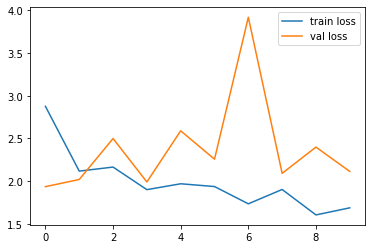

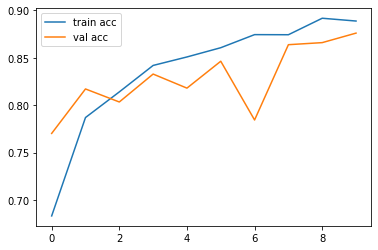

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [31]:
y_pred = model.predict(test_set)

In [32]:
y_pred

array([[0.0000000e+00, 1.3807857e-34, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3870213e-14, 1.2424083e-24, 2.3014726e-08, ..., 1.8217626e-29,
        9.5017039e-10, 7.9083437e-27],
       [1.0000000e+00, 2.9627491e-36, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.4305770e-26, 1.0000000e+00, ..., 0.0000000e+00,
        4.8921644e-38, 0.0000000e+00],
       [0.0000000e+00, 9.9999893e-01, 1.4466234e-28, ..., 1.5881506e-28,
        1.4374267e-12, 0.0000000e+00]], dtype=float32)